In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
olive = datasets.fetch_olivetti_faces()

In [3]:
olive.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
olive["data"].shape

(400, 4096)

In [5]:
olive["images"].shape

(400, 64, 64)

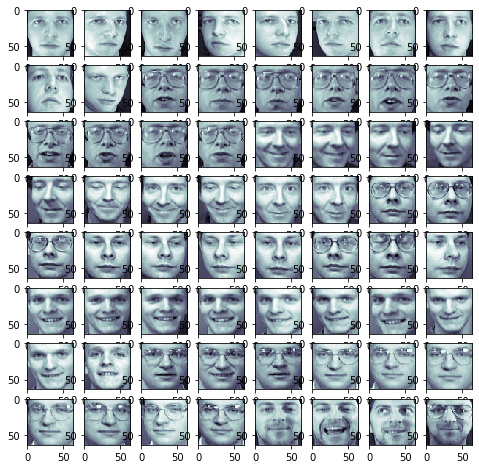

In [6]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(olive.images[i], cmap = plt.cm.bone)
plt.show()

In [7]:
x = olive.data
y = olive.target

In [8]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_.shape

(400, 4096)

In [10]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total<0.99:
    currentSum += pca.explained_variance_[k]
    k+=1
k

260

In [11]:
pca = PCA(n_components = k)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 260)

In [18]:
pca.components_.shape

(260, 4096)

In [12]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [13]:
x_aprrox_images = x_approx.reshape((400,64,64))

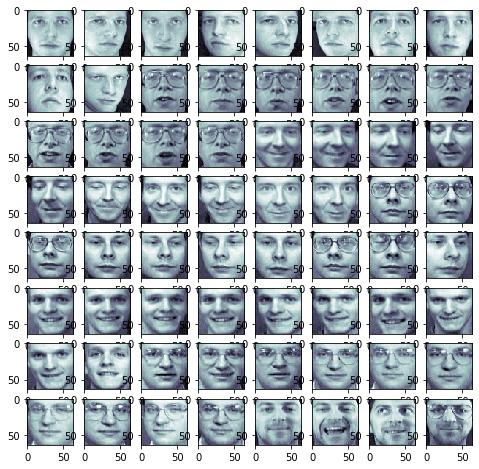

In [14]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_aprrox_images[i], cmap = plt.cm.bone)
plt.show()

In [15]:
eigenv = pca.components_
eigenv.shape

(260, 4096)

In [16]:
eigenfaces = eigenv.reshape((260,64,64)) 

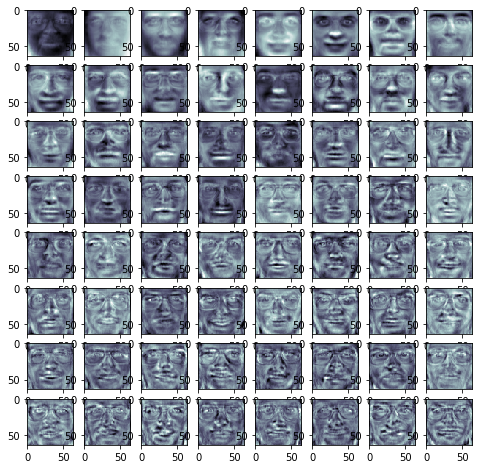

In [17]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)
plt.show()